<a href="https://colab.research.google.com/github/YaninaTesta/Proyectos/blob/main/Notebook_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Procesamiento y transformación de datos

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Procesamiento de datos 📊 que aprendimos hasta ahora. Vamos a seguir trabajando con el dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) que guardamos en la Notebook 10 luego de eliminar valores faltantes y filtrar outliers.

### 🛠 Procesando datos para ML- Feature Engeneering 🔧

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/clientes_mall_transformado.csv')

In [3]:
data.head()

,Unnamed: 0,CustomerID,Genre,Age,annual_income,spending_score,grupo_edad
0,0,1.0,Male,19.0,15.0,39.0,18-25
1,2,3.0,Female,20.0,16.0,6.0,18-25
2,3,4.0,Female,23.0,16.0,77.0,18-25
3,5,6.0,Female,22.0,17.0,76.0,18-25
4,7,8.0,Female,23.0,18.0,94.0,18-25


#### DESCUBRIENDO NUEVAS VARIABLES

🤔 &nbsp; **_¿Puedo generar nuevas variables a través de las ya presentes? ¿Qué aportaría al entendimiento de los datos la creación de esta/s variable/s?_**

In [6]:
"Aportaria q las columnas renombradas sean mas claras para el analisis de los datos"

'Aportaria q las columnas renombradas sean mas claras para el analisis de los datos'

In [9]:
data.rename(columns={'spending score (1-100)':'spending_score', 'annual income (k$)':'annual_income'}, inplace=True)

In [10]:
data

,Unnamed: 0,CustomerID,Genre,Age,annual_income,spending_score,grupo_edad
0,0,1.0,Male,19.0,15.0,39.0,18-25
1,2,3.0,Female,20.0,16.0,6.0,18-25
2,3,4.0,Female,23.0,16.0,77.0,18-25
3,5,6.0,Female,22.0,17.0,76.0,18-25
4,7,8.0,Female,23.0,18.0,94.0,18-25
...,...,...,...,...,...,...,...
134,194,195.0,Female,47.0,120.0,16.0,46-55
135,196,197.0,Female,45.0,126.0,28.0,36-45
136,197,198.0,Male,32.0,126.0,74.0,26-35
137,198,199.0,Male,32.0,137.0,18.0,26-35


#### ESTANDARIZACION DE DATOS

🤔 &nbsp; **_¿Crees que tus variables deben ser estandarizadas?_**

Si es así, elige una estrategia y aplicala

🚀 _Recuerda qué_ vimos dos metodos para estandarizar o reescalar variables: `StandardScaler` que usa z-score y `MinMaxScaler` que reescala los datos linealmente. Lee la documentación para [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) y para [Min Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

- En una situación en la vida real, este paso podríamos realizarlo ahora, ya que ya sabriamos que algoritmo queremos usar o pregunta nos queremos contenstar. En el contexto del curso, en la clase 6 aún no hemos visto aprendizaje automatico. Por lo cual, si no consideraron realizar un scaling esta bien. Podrán hacerlo en el ejercicio de la clase 8, que utilizaremos este dataset.

In [11]:
from sklearn.preprocessing import StandardScaler

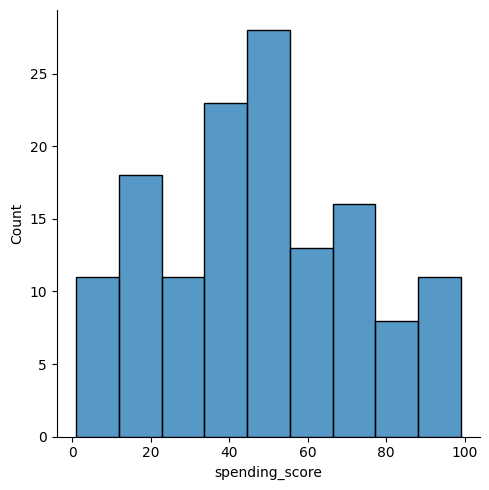

In [12]:
sns.displot(data['spending_score'])

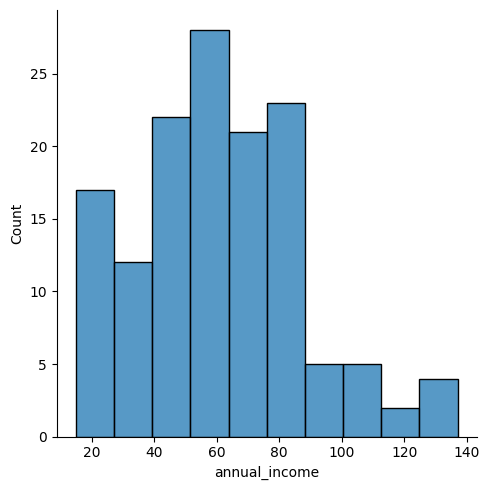

In [14]:
sns.displot(data['annual_income'])

In [23]:
scaler = StandardScaler()

In [27]:
reading_scale = scaler.fit_transform(data[['annual_income']])

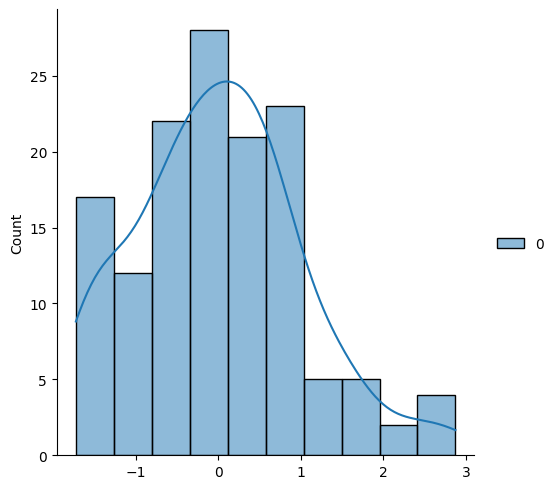

In [28]:
sns.displot(reading_scale, kde=True)

#### TRANSFORMACION DE VARIABLES

🤔 &nbsp; **¿Tienes variables categoricas en tu dataset? ¿Estan representadas por números o por strings? ¿Crees que debes generar variables dummies o realizar un encoding de las categorias?**

🚀 _Recuerda qué_ hablamos de varias funciones para poder llevar a cabo estas transformaciones. Algunas de ellas como `get_dummies` y `map` pertenecen a `pandas`, mientras que otras como `LabelEncoder` y `OneHotEncoder` son parte de `sklearn`.

Si queres saber más, chequea la documentación de [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) y [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [29]:
pd.get_dummies(data, columns=["Genre"])

,Unnamed: 0,CustomerID,Age,annual_income,spending_score,grupo_edad,female,male,Genre_Female,Genre_Male
0,0,1.0,19.0,15.0,39.0,18-25,False,True,False,True
1,2,3.0,20.0,16.0,6.0,18-25,True,False,True,False
2,3,4.0,23.0,16.0,77.0,18-25,True,False,True,False
3,5,6.0,22.0,17.0,76.0,18-25,True,False,True,False
4,7,8.0,23.0,18.0,94.0,18-25,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
134,194,195.0,47.0,120.0,16.0,46-55,True,False,True,False
135,196,197.0,45.0,126.0,28.0,36-45,True,False,True,False
136,197,198.0,32.0,126.0,74.0,26-35,False,True,False,True
137,198,199.0,32.0,137.0,18.0,26-35,False,True,False,True


In [30]:
pd.get_dummies(data["Genre"])

,Female,Male
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
134,True,False
135,True,False
136,False,True
137,False,True


In [31]:
data[['female', 'male']] = pd.get_dummies(data["Genre"])

In [32]:
data.head()

,Unnamed: 0,CustomerID,Genre,Age,annual_income,spending_score,grupo_edad,female,male
0,0,1.0,Male,19.0,15.0,39.0,18-25,False,True
1,2,3.0,Female,20.0,16.0,6.0,18-25,True,False
2,3,4.0,Female,23.0,16.0,77.0,18-25,True,False
3,5,6.0,Female,22.0,17.0,76.0,18-25,True,False
4,7,8.0,Female,23.0,18.0,94.0,18-25,True,False


#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

1) **Utiliza la función `.to_csv()` para guardar tu dataset**.

In [33]:
datos = data.to_csv('datos_procesados.csv', index=False)